In [1]:
import pandas as pd 
import numpy as np 


In [2]:
working_df = pd.read_csv("working_sample_1.csv")

In [3]:
working_df_clean = working_df.drop(columns="Unnamed: 0")
print(working_df_clean.head())

         date  isin  cs_change  delta lr  change_in_10y_bond  change_in_slope  \
0  2022-11-30     0   -0.00267  0.000058            -0.00028         -0.00395   
1  2022-12-31     0   -0.00102  0.000058             0.00517          0.00171   
2  2023-01-31     0   -0.00020  0.000024            -0.00310         -0.00158   
3  2023-02-28     0    0.00077  0.000024             0.00167         -0.00069   
4  2023-03-31     0    0.00259  0.000024            -0.00229         -0.00179   

   smi_return  v3x_change rating  maturity  cpi_change  unempl_change  \
0    0.027314   -0.030361    AAA      10.0      0.0040            0.1   
1   -0.036456   -0.005036    AAA      10.0     -0.2283            0.1   
2    0.050557    0.005429    AAA      10.0      0.6286            0.1   
3   -0.016747   -0.001126    AAA      10.0      0.7838            0.0   
4    0.000710   -0.016202    AAA      10.0      0.1623           -0.1   

   gdp_change  liquidity  credit_rating_numeric     rating_class  \
0    0

## Regressions

In [4]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm
X = working_df_clean[['delta lr', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change','liquidity']]
y = working_df_clean['cs_change']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())
print(model.rsquared)

                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          3.62e-156
Time:                        16:09:35   Log-Likelihood:             1.7873e+05
No. Observations:               36220   AIC:                        -3.575e+05
Df Residuals:                   36213   BIC:                        -3.574e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -7.06e-05   1.46

In [5]:
X = working_df_clean[['delta lr', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'cpi_change', 'unempl_change', 'gdp_change', 'liquidity']]
y = working_df_clean['cs_change']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())
print(model.rsquared)

                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          1.01e-239
Time:                        16:09:35   Log-Likelihood:             1.7894e+05
No. Observations:               36220   AIC:                        -3.579e+05
Df Residuals:                   36210   BIC:                        -3.578e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0001    1.8

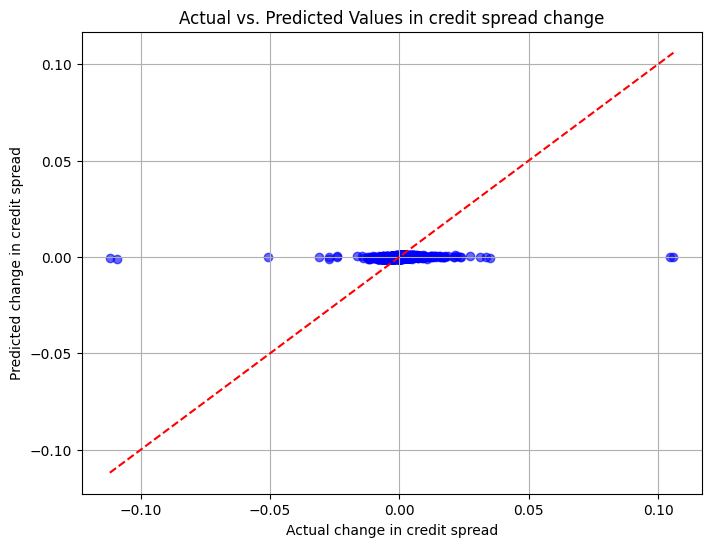

In [6]:
import matplotlib.pyplot as plt

# Get predicted values from the model
y_pred = model.fittedvalues

# Plot actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Actual vs. Predicted Values in credit spread change")
plt.xlabel("Actual change in credit spread")
plt.ylabel("Predicted change in credit spread")
plt.grid(True)
# plt.ylim(-10, +10)
# plt.xlim(-25, +25)
plt.show()

## Regressions by classes and maturities

### 6-factor regression

In [7]:
results_by_rating = {}
r_squared_table = {}

coef_table = pd.DataFrame()
for group_name, group_data in working_df_clean.groupby('rating_class'):
    y_group = group_data['cs_change']
    x_group = group_data[['delta lr', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'liquidity']]
    x_group = sm.add_constant(x_group)
    model1 = sm.OLS(y_group, x_group).fit()
    
    coef = model1.params
    coef.name = group_name

    coef_table = pd.concat([coef_table, coef], axis=1)
    
    print(f"\n\nResult for {group_name}")
    print(model1.summary)
    print(model1.summary())
    results_by_rating[group_name] = model1
    
    r_squared_table[group_name] = model1.rsquared
    

coef_table = coef_table.T



Result for A class bonds
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x1346f2f00>>
                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     29.68
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           4.53e-35
Time:                        16:09:35   Log-Likelihood:                 23696.
No. Observations:                4452   AIC:                        -4.738e+04
Df Residuals:                    4445   BIC:                        -4.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      

In [8]:
print(coef_table)

                    const  delta lr  change_in_10y_bond  change_in_slope  \
A class bonds   -0.000070  0.001514           -0.044134         0.125561   
AA class bonds  -0.000120  0.001983           -0.045893         0.126195   
AAA class bonds -0.000066  0.001880           -0.059251         0.160890   
BBB/BB/B bonds   0.000031 -0.000399           -0.104502         0.096717   
Not rated bonds -0.000039  0.001096           -0.050186         0.190573   

                 smi_return  v3x_change  liquidity  
A class bonds     -0.004528    0.000327   0.000087  
AA class bonds    -0.004213    0.001034   0.000119  
AAA class bonds   -0.003905    0.000224   0.000072  
BBB/BB/B bonds    -0.008395   -0.002473   0.000056  
Not rated bonds   -0.004389    0.000049   0.000046  


In [9]:
# Create R² DataFrame
r_squared_table = pd.Series(r_squared_table, name='R_squared')
# Print
print(r_squared_table)

A class bonds      0.038523
AA class bonds     0.037247
AAA class bonds    0.020895
BBB/BB/B bonds     0.008002
Not rated bonds    0.013490
Name: R_squared, dtype: float64


### 9-factor regression

In [10]:
results_by_rating = {}
r_squared_table = {}

coef_table = pd.DataFrame()
for group_name, group_data in working_df_clean.groupby('rating_class'):
    y_group = group_data['cs_change']
    x_group = group_data[['delta lr', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'cpi_change', 'unempl_change', 'gdp_change', 'liquidity']]
    x_group = sm.add_constant(x_group)
    model1 = sm.OLS(y_group, x_group).fit()
    
    coef = model1.params
    coef.name = group_name

    coef_table = pd.concat([coef_table, coef], axis=1)
    
    print(f"\n\nResult for {group_name}")
    print(model1.summary)
    print(model1.summary())
    results_by_rating[group_name] = model1
    
    r_squared_table[group_name] = model1.rsquared
    

coef_table = coef_table.T




Result for A class bonds
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x1448eaf00>>
                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     32.99
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.10e-56
Time:                        16:09:35   Log-Likelihood:                 23753.
No. Observations:                4452   AIC:                        -4.749e+04
Df Residuals:                    4442   BIC:                        -4.742e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      

In [11]:
print(coef_table)

                    const  delta lr  change_in_10y_bond  change_in_slope  \
A class bonds   -0.000158  0.001673           -0.066062         0.145374   
AA class bonds  -0.000188  0.002243           -0.066269         0.146284   
AAA class bonds -0.000141  0.002087           -0.081373         0.182269   
BBB/BB/B bonds   0.000001 -0.000150           -0.118172         0.108445   
Not rated bonds -0.000057  0.001260           -0.063312         0.204340   

                 smi_return  v3x_change  cpi_change  unempl_change  \
A class bonds     -0.004408   -0.000017    0.000625      -0.000196   
AA class bonds    -0.004148    0.000620    0.000632      -0.000189   
AAA class bonds   -0.003862   -0.000262    0.000696      -0.000152   
BBB/BB/B bonds    -0.008247   -0.002611    0.000448      -0.000208   
Not rated bonds   -0.004327   -0.000385    0.000569      -0.000075   

                 gdp_change  liquidity  
A class bonds      0.000108   0.000108  
AA class bonds     0.000009   0.000134  

In [12]:
# Create R² DataFrame
r_squared_table = pd.Series(r_squared_table, name='R_squared')
# Print
print(r_squared_table)

A class bonds      0.062652
AA class bonds     0.055711
AAA class bonds    0.034012
BBB/BB/B bonds     0.010401
Not rated bonds    0.017388
Name: R_squared, dtype: float64


### Regression by maturities

In [13]:
results_by_maturity = {}
r_squared_table = {}

coef_table = pd.DataFrame()
for group_name, group_data in working_df_clean.groupby('maturity_bucket'):
    y_group = group_data['cs_change']
    x_group = group_data[['delta lr', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'cpi_change', 'unempl_change', 'gdp_change','liquidity']]
    x_group = sm.add_constant(x_group) 
    
    model = sm.OLS(y_group, x_group).fit()
    
    coef = model.params
    coef.name = group_name

    coef_table = pd.concat([coef_table, coef], axis=1)
    
    print(f"\n\nResult for {group_name}")
    print(model.summary)
    print(model.summary())
    results_by_maturity[group_name] = model
    
    r_squared_table[group_name] = model.rsquared
    

coef_table = coef_table.T




Result for Long-Term
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x1346f2f00>>
                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     67.82
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          2.32e-123
Time:                        16:09:36   Log-Likelihood:                 84212.
No. Observations:               16933   AIC:                        -1.684e+05
Df Residuals:                   16923   BIC:                        -1.683e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.0

In [14]:
# Print
print(coef_table)

                const  delta lr  change_in_10y_bond  change_in_slope  \
Long-Term   -0.000135  0.002306           -0.079778         0.172982   
Medium-Term -0.000141  0.001473           -0.065985         0.163430   
Short-Term  -0.000153  0.004400           -0.138613         0.240496   

             smi_return  v3x_change  cpi_change  unempl_change  gdp_change  \
Long-Term     -0.004223   -0.000038    0.000681      -0.000165    0.000027   
Medium-Term   -0.004289   -0.000103    0.000581      -0.000167   -0.000013   
Short-Term    -0.002341   -0.001671    0.001162       0.000115   -0.000272   

             liquidity  
Long-Term     0.000078  
Medium-Term   0.000115  
Short-Term    0.000095  


In [15]:
r_squared_table3 = pd.Series(r_squared_table, name='R_squared')
print(r_squared_table3)

Long-Term      0.034815
Medium-Term    0.027699
Short-Term     0.053748
Name: R_squared, dtype: float64
